In [1]:
import numpy as np
import pandas as pd

In [32]:
# USe Dictionary for creating Data or Load a CSV file which has relational data
data = {
    'Name': ['Nandu', 'Anupriya', 'Ashna', 'Digil', 'Kiran', 'Manoj', 'Sanya', 'Preethi', 'Vishal', 'Neha',
             'Aditya', 'Sophie', 'Arun', 'Ravi', 'Divya', 'Isha', 'Rahul', 'Amit', 'Shreya', 'Varun'],
    'Age': [26, 24, 24, 26, 28, 30, 22, 25, 27, 29,
            23, 26, 31, 28, 24, 27, 29, 30, 26, 22],
    'Job': ['Intern', 'Engineer', 'Engineer', 'Senior Engineer', 'Manager', 'Intern', 'Engineer', 'Engineer', 'Senior Engineer', 'Manager',
            'Intern', 'Engineer', 'Senior Engineer', 'Manager', 'Intern', 'Engineer', 'Senior Engineer', 'Manager', 'Intern', 'Engineer'],
    'Salary': [None, 500000, 500000, 600000, 800000, 100000, 450000, 480000, 650000, 820000,
               None, 510000, 620000, 850000, 120000, 460000, 630000, 870000, 90000, 490000]
}
data

{'Name': ['Nandu',
  'Anupriya',
  'Ashna',
  'Digil',
  'Kiran',
  'Manoj',
  'Sanya',
  'Preethi',
  'Vishal',
  'Neha',
  'Aditya',
  'Sophie',
  'Arun',
  'Ravi',
  'Divya',
  'Isha',
  'Rahul',
  'Amit',
  'Shreya',
  'Varun'],
 'Age': [26,
  24,
  24,
  26,
  28,
  30,
  22,
  25,
  27,
  29,
  23,
  26,
  31,
  28,
  24,
  27,
  29,
  30,
  26,
  22],
 'Job': ['Intern',
  'Engineer',
  'Engineer',
  'Senior Engineer',
  'Manager',
  'Intern',
  'Engineer',
  'Engineer',
  'Senior Engineer',
  'Manager',
  'Intern',
  'Engineer',
  'Senior Engineer',
  'Manager',
  'Intern',
  'Engineer',
  'Senior Engineer',
  'Manager',
  'Intern',
  'Engineer'],
 'Salary': [None,
  500000,
  500000,
  600000,
  800000,
  100000,
  450000,
  480000,
  650000,
  820000,
  None,
  510000,
  620000,
  850000,
  120000,
  460000,
  630000,
  870000,
  90000,
  490000]}

In [60]:
df=pd.DataFrame(data)
df

,Name,Age,Job,Salary
0,Nandu,26,Intern,NaN
1,Anupriya,24,Engineer,500000.0
2,Ashna,24,Engineer,500000.0
3,Digil,26,Senior Engineer,600000.0
4,Kiran,28,Manager,800000.0
5,Manoj,30,Intern,100000.0
6,Sanya,22,Engineer,450000.0
7,Preethi,25,Engineer,480000.0
8,Vishal,27,Senior Engineer,650000.0
9,Neha,29,Manager,820000.0


In [61]:
# Check for missing values
print(df.isnull().sum())


Name      0
Age       0
Job       0
Salary    2
dtype: int64


Exploratory Data ANalysis

In [62]:
# Display basic info about the DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    20 non-null     object 
 1   Age     20 non-null     int64  
 2   Job     20 non-null     object 
 3   Salary  18 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 768.0+ bytes
None


In [63]:
# Get summary statistics for numerical columns
print(df.describe())


             Age         Salary
count  20.000000      18.000000
mean   26.350000  530000.000000
std     2.680829  239681.160761
min    22.000000   90000.000000
25%    24.000000  465000.000000
50%    26.000000  505000.000000
75%    28.250000  645000.000000
max    31.000000  870000.000000


In [64]:
# Check for missing values
print(df.isnull().sum())


Name      0
Age       0
Job       0
Salary    2
dtype: int64


In [65]:
df['Salary'] = df['Salary'].fillna(100000)

In [66]:
# Check for missing values
print(df.isnull().sum())

Name      0
Age       0
Job       0
Salary    0
dtype: int64


In [67]:
# Frequency counts of categorical features
print(df['Job'].value_counts())


Job
Engineer           7
Intern             5
Senior Engineer    4
Manager            4
Name: count, dtype: int64


PLOTTING

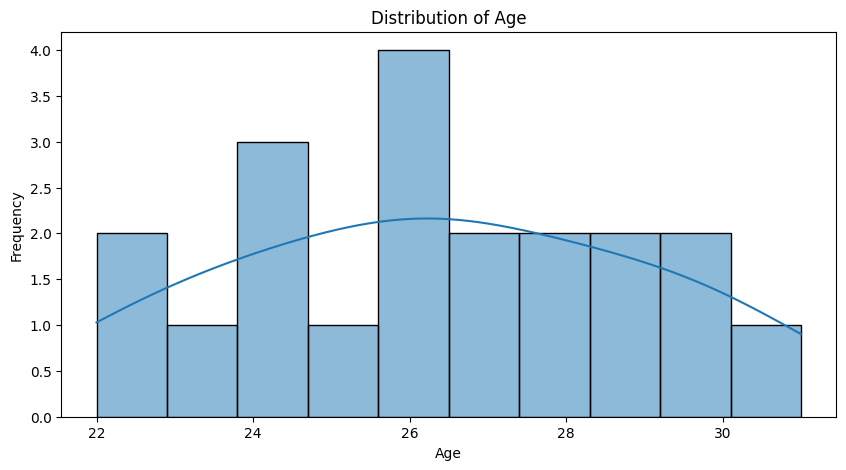

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Age
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




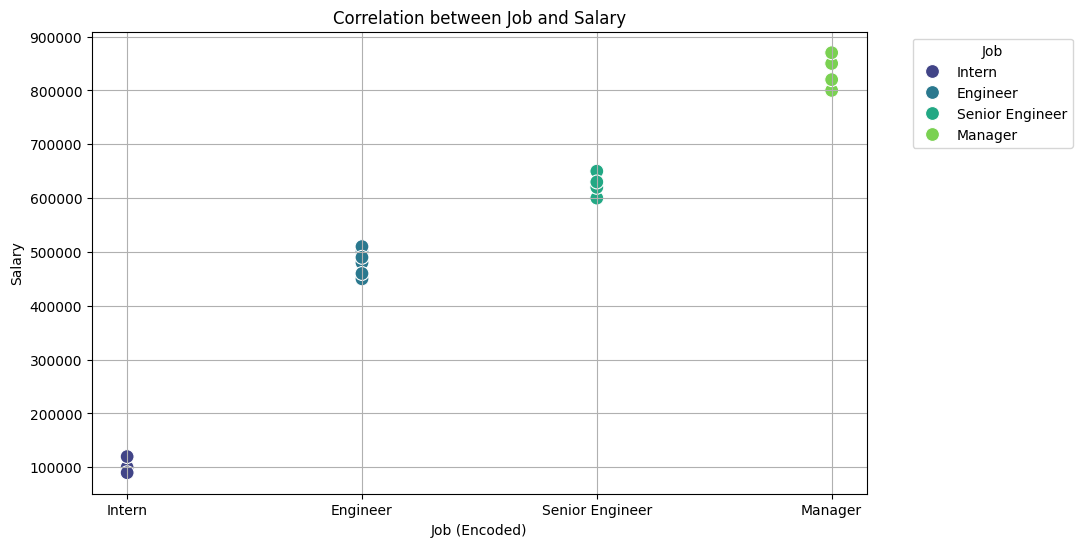

In [71]:
# Remove rows with missing Salary values
df = df.dropna(subset=['Salary'])

# Encode 'Job' as numerical values
df['Job_encoded'] = pd.factorize(df['Job'])[0]

# Plotting the correlation between Job and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Job_encoded', y='Salary', data=df, hue='Job', palette='viridis', s=100)

# Add labels and title
plt.title('Correlation between Job and Salary')
plt.xlabel('Job (Encoded)')
plt.ylabel('Salary')
plt.xticks(ticks=df['Job_encoded'].unique(), labels=df['Job'].unique())
plt.legend(title='Job', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [124]:
df['Job']

,Job
0,Intern
1,Engineer
2,Engineer
3,Senior Engineer
4,Manager
5,Intern
6,Engineer
7,Engineer
8,Senior Engineer
9,Manager


In [125]:
label_encoder = LabelEncoder()
df['Job_Encoded'] = label_encoder.fit_transform(df['Job'])

In [140]:
X = df[['Age', 'Salary']]
y = df['Job_Encoded']
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [139]:
importances = clf.feature_importances_
features = X.columns

# Print feature importances
for feature, importance in zip(features, importances):
    print(f"Feature: {feature}, Importance: {importance}")


Feature: Age, Importance: 0.3333423151797448
Feature: Salary, Importance: 0.6666576848202551


In [127]:
y

,Job_Encoded
0,1
1,0
2,0
3,3
4,2
5,1
6,0
7,0
8,3
9,2


In [128]:
print(df['Job'].value_counts())



Job
Engineer           7
Intern             5
Senior Engineer    4
Manager            4
Name: count, dtype: int64


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [130]:
X_train

,Age,Salary
15,27,460000.0
1,24,500000.0
8,27,650000.0
5,30,100000.0
11,26,510000.0
3,26,600000.0
18,26,90000.0
16,29,630000.0
13,28,850000.0
2,24,500000.0


In [131]:
X_test

,Age,Salary
0,26,100000.0
17,30,870000.0


In [132]:
y_train

,Job_Encoded
15,0
1,0
8,3
5,1
11,0
3,3
18,1
16,3
13,2
2,0


In [133]:
y_test

,Job_Encoded
0,1
17,2


RANDOM FOREST


Random Forest is an ensemble learning method used for classification and regression tasks. It combines the predictions of multiple decision trees to improve accuracy and control overfitting. Here’s a detailed breakdown of Random Forest:

Key Concepts:
Ensemble Learning:

Ensemble Learning involves combining predictions from multiple models to achieve better performance than individual models.
Decision Trees:

A Decision Tree is a model that splits data based on feature values to make predictions. It creates a tree-like structure where each node represents a feature and each branch represents a decision rule.
How Random Forest Works:
Bagging (Bootstrap Aggregating):

Bagging involves creating multiple subsets of the training data by randomly sampling with replacement (bootstrap sampling).
A separate decision tree is trained on each subset of the data.
Random Feature Selection:

During the training of each decision tree, a random subset of features is selected for splitting at each node. This introduces diversity among the trees and helps improve the model’s generalization ability.
Aggregation:

For classification, each tree votes for a class, and the class with the majority votes becomes the final prediction.
For regression, the predictions from all trees are averaged to obtain the final result.
Advantages of Random Forest:
Improved Accuracy:

Combining predictions from multiple trees reduces the risk of overfitting and generally leads to better accuracy than individual decision trees.
Robustness:

Random Forest is less sensitive to noise and outliers because the aggregation of multiple trees smooths out anomalies.
Feature Importance:

Random Forest can provide insights into the importance of different features in making predictions, which can be useful for feature selection.
Versatility:

It can be used for both classification and regression tasks and works well with both numerical and categorical data.
Disadvantages of Random Forest:
Complexity:

While Random Forests generally perform well, they can be computationally intensive and harder to interpret compared to individual decision trees.
Training Time:

Training multiple decision trees can be time-consuming, especially with large datasets.

In [134]:
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [135]:
y_pred = clf.predict(X_test)

In [136]:
y_pred

array([1, 2])

In [137]:
from sklearn.metrics import classification_report, accuracy_score

# Step 7: Show classification report and accuracy
print("Classification Report:")
# Use 'labels' to specify all classes in the original data, even if they are not in y_test
print(classification_report(y_test, y_pred, labels=[0, 1, 2,3], target_names=label_encoder.classes_))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Classification Report:
                 precision    recall  f1-score   support

       Engineer       0.00      0.00      0.00         0
         Intern       1.00      1.00      1.00         1
        Manager       1.00      1.00      1.00         1
Senior Engineer       0.00      0.00      0.00         0

      micro avg       1.00      1.00      1.00         2
      macro avg       0.50      0.50      0.50         2
   weighted avg       1.00      1.00      1.00         2

Accuracy: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

TESTING

Single predictions

In [145]:
# Predict on new data
new_employee = pd.DataFrame({
    'Age': [26],
    'Salary': [700000.0]
})
predicted_job_encoded = clf.predict(new_employee)
predicted_job = label_encoder.inverse_transform(predicted_job_encoded)
print(f"Predicted Job Position: {predicted_job[0]}")

Predicted Job Position: Senior Engineer


Batch Predictions

In [152]:
# Predict for a batch of new data
new_data = pd.DataFrame({
    'Age': [25, 30, 26,35],
    'Salary': [576000, 623000, 150000,1300000]
})
predicted_job_encoded = clf.predict(new_data)

# Decode predictions
predicted_job = label_encoder.inverse_transform(predicted_job_encoded)

# Access and print predictions for each instance
for i, job in enumerate(predicted_job):
    print(f"Prediction for instance {i+1}: {job}")

Prediction for instance 1: Engineer
Prediction for instance 2: Senior Engineer
Prediction for instance 3: Intern
Prediction for instance 4: Manager
